In [1]:
#Importing Libraries

import random
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torchvision import datasets, transforms
from collections import OrderedDict
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Loading Dataset

In [2]:
data_dir = 'Dataset'

train_transform = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transform = transforms.Compose([transforms.Resize(255),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406],
                                                          [0.229, 0.224, 0.225])])

train_dataset = datasets.ImageFolder(data_dir+'/train', transform=train_transform)
test_dataset = datasets.ImageFolder(data_dir+'/test',transform=test_transform)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=32)

#### Display 10 Training Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

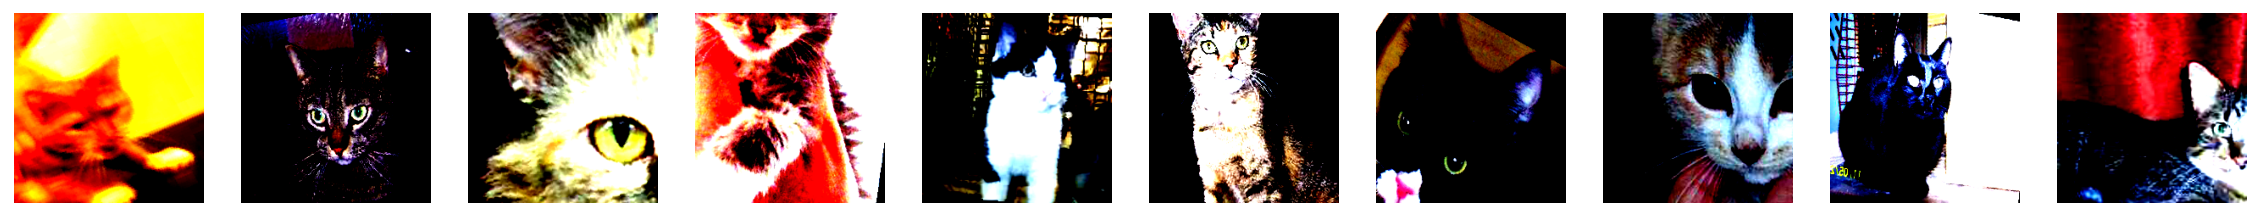

In [3]:
images, labels = next(iter(trainloader))
fig,axes = plt.subplots(figsize=(20,20),ncols=10)
for i in range(10):
    axes[i].imshow(images[i].numpy().transpose(1,2,0))
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].set_xticklabels('')
    axes[i].set_yticklabels('')
    axes[i].tick_params(axis='both', length=0)

#### Displaying 10 testing images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

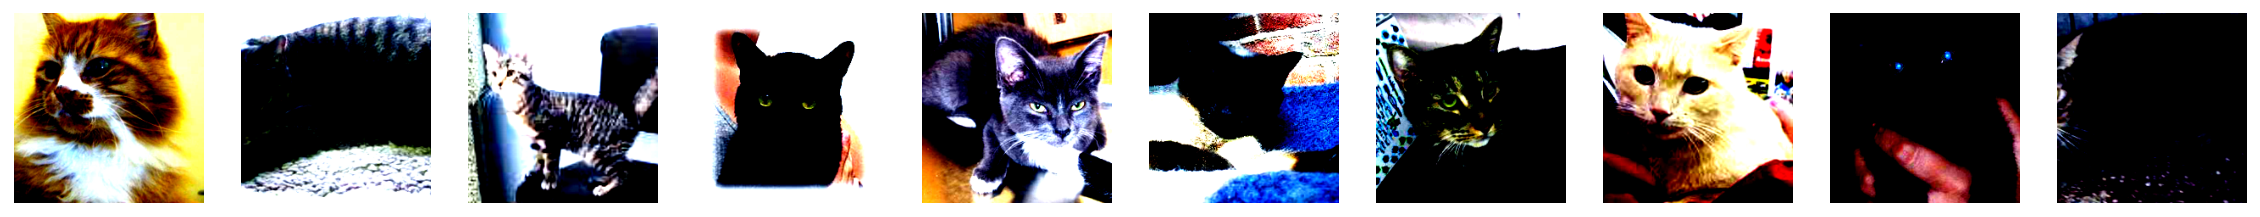

In [4]:
images, labels = next(iter(testloader))
fig,axes = plt.subplots(figsize=(20,20),ncols=10)
for i in range(10):
    axes[i].imshow(images[i].numpy().transpose(1,2,0))
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].set_xticklabels('')
    axes[i].set_yticklabels('')
    axes[i].tick_params(axis='both', length=0)

## Using Densenet121 as our model

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.densenet121(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

model.classifier = nn.Sequential(nn.Linear(1024,256),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.Linear(256,2),
                           nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(),lr=0.003)
model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

### Training Our Model

In [9]:
epochs = 1
running_loss=0
count=0
track=5
for e in range(epochs):
    for images,labels in trainloader:
        count+=1
        images,labels = images.to(device),labels.to(device)
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if(count%track == 0):
            test_loss = 0
            acc=0
            model.eval()
            with torch.no_grad():
                for images,labels in testloader:
                    images,labels = images.to(device),labels.to(device)
                    log_ps = model(images)
                    loss = criterion(log_ps,labels)
                    test_loss += loss.item()
                    ps = torch.exp(log_ps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    acc += torch.mean(equals.type(torch.FloatTensor)).item()
            print(f"Epoch {e+1}/{epochs}.. "
                  f"Train loss: {running_loss/track:.3f}.. "
                  f"Test loss: {test_loss/len(testloader):.3f}.. "
                  f"Test accuracy: {acc/len(testloader):.3f}")
            running_loss=0
            model.train()



Epoch 1/1.. Train loss: 0.000.. Test loss: 30.777.. Test accuracy: 0.494
Epoch 1/1.. Train loss: 0.000.. Test loss: 32.168.. Test accuracy: 0.494


KeyboardInterrupt: 